In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer

In [4]:
df = pd.read_table('/tmp/SMSSpamCollection', header=None)
df.columns=['class', 'text']
df.head()

,class,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [61]:
cv = CountVectorizer(stop_words='english')
cv.fit(df['text'])

spam_X = cv.transform(df[df['class'] == 'spam']['text'])
ham_X = cv.transform(df[df['class'] == 'ham']['text'])

spam_counts = np.asarray(spam_X.sum(axis=0)).ravel()
ham_counts = np.asarray(ham_X.sum(axis=0)).ravel()
# spam_X, ham_X = map(lambda x: np.asarray(x).ravel(), [spam_X, ham_X])

(6000.0, 9000.0)

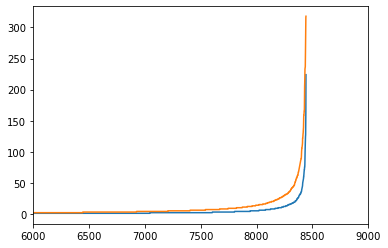

In [65]:
plt.plot(np.sort(spam_counts))
plt.plot(np.sort(ham_counts))
plt.xlim(6000, 9000)

In [67]:
from sklearn.model_selection import train_test_split

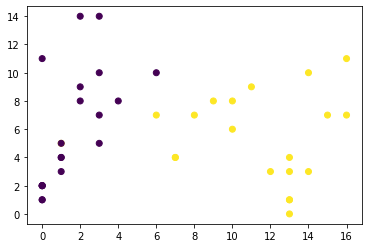

In [95]:
THRESH = 5

spam_mask = spam_counts > THRESH
ham_mask = ham_counts > THRESH
mask = np.c_[spam_mask, ham_mask].astype(int)

spam_samples = spam_X[np.random.choice(np.arange(spam_X.shape[0]), size=(20,))].todense()
ham_samples = ham_X[np.random.choice(np.arange(ham_X.shape[0]), size=(20,))].todense()


x_scat = np.asarray(np.dot(np.r_[spam_samples, ham_samples], mask))
labels = np.zeros((40,))
labels[:20] = 1
plt.scatter(*x_scat.T, c=labels)

In [96]:
from sklearn.linear_model import Perceptron

In [97]:
perc = Perceptron()
perc.fit(x_scat, labels)

Perceptron()

In [98]:
perc.coef_

array([[ 23., -17.]])

In [99]:
perc.intercept_

array([-1.])

In [129]:
xx, yy = np.meshgrid(np.linspace(-1, 17, 1000), np.linspace(-1, 15, 1000))
# yy = np.meshgrid()
contour = perc.predict(np.c_[xx.ravel(), yy.ravel()])
contour = contour.reshape(xx.shape)

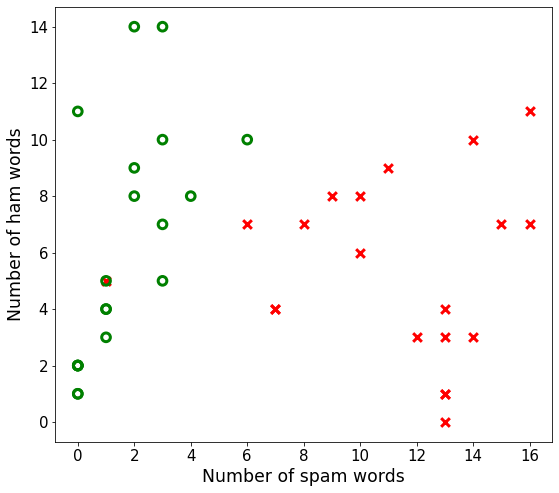

In [140]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.scatter(*x_scat[labels==1].T, marker='x', c='r', s=75, linewidth=3)
ax.scatter(*x_scat[labels==0].T, marker='o', edgecolors='g', fc='none', s=75, linewidth=3)
ax.set_aspect('equal')
# ax.contourf(xx, yy, contour, cmap=plt.cm.Paired, alpha=0.5)
ax.set_xlabel('Number of spam words', fontsize='xx-large')
_ = ax.set_ylabel('Number of ham words', fontsize='xx-large')
ax.tick_params(axis='both', which='major', labelsize=15)

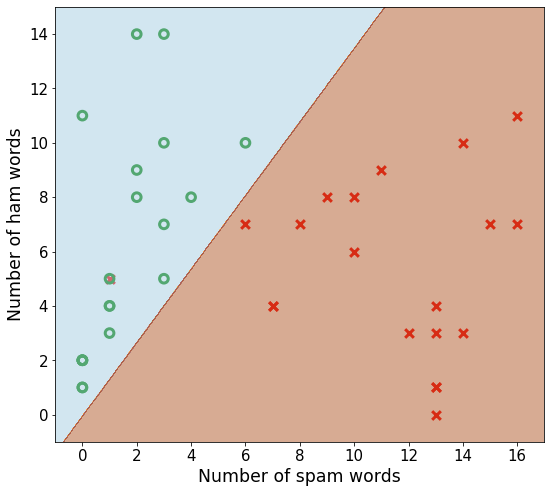

In [141]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.scatter(*x_scat[labels==1].T, marker='x', c='r', s=75, linewidth=3)
ax.scatter(*x_scat[labels==0].T, marker='o', edgecolors='g', fc='none', s=75, linewidth=3)
ax.set_aspect('equal')
ax.contourf(xx, yy, contour, cmap=plt.cm.Paired, alpha=0.5)
ax.set_xlabel('Number of spam words', fontsize='xx-large')
_ = ax.set_ylabel('Number of ham words', fontsize='xx-large')
ax.tick_params(axis='both', which='major', labelsize=15)

In [150]:
disp_spam_mask = spam_counts > 50
disp_ham_mask = ham_counts > 50

np.array(cv.get_feature_names())[disp_spam_mask]

array(['150p', '16', '18', '50', 'cash', 'claim', 'com', 'contact',
       'free', 'just', 'mobile', 'msg', 'new', 'nokia', 'prize', 'reply',
       'send', 'service', 'stop', 'text', 'tone', 'txt', 'uk', 'ur',
       'urgent', 'week', 'win', 'won', 'www'], dtype='<U34')

In [151]:
np.array(cv.get_feature_names())[disp_ham_mask]

array(['amp', 'ask', 'babe', 'buy', 'care', 'come', 'coming', 'cos', 'da',
       'day', 'dear', 'did', 'doing', 'don', 'dont', 'dun', 'feel',
       'fine', 'free', 'going', 'gonna', 'good', 'got', 'great', 'gt',
       'gud', 'haha', 'happy', 'hey', 'hi', 'home', 'hope', 'im', 'just',
       'know', 'late', 'later', 'leave', 'let', 'life', 'like', 'll',
       'lol', 'lor', 'love', 'lt', 'make', 'meet', 'message', 'miss',
       'money', 'morning', 'msg', 'need', 'new', 'nice', 'night',
       'number', 'oh', 'ok', 'phone', 'pick', 'place', 'pls', 'really',
       'right', 'said', 'say', 'send', 'sent', 'sleep', 'soon', 'sorry',
       'sure', 'tell', 'text', 'thanks', 'thing', 'things', 'think',
       'time', 'today', 'told', 'tomorrow', 'tonight', 'ur', 've', 'wait',
       'wan', 'want', 'wat', 'way', 'week', 'went', 'wish', 'work', 'ya',
       'yeah', 'yes'], dtype='<U34')